# Sheet 01

## Exercise 1
numerical stability 

#### a)

In [172]:
import numpy as np
import matplotlib.pyplot as plt

#deviation by more than 1 percent
def f(x):
    return (x**3+(1/3))-(x**3-(1/3))

for x in range(48988):
    if((np.abs(f(x)-(2/3))/(2/3)) > 0.01):
        print("f(x) deviates by more than 1 percent for all x >", x)
        break

for x in range(48988):
    if((np.abs(f(-x)-(2/3))/(2/3)) > 0.01):
        print("f(x) deviates by more than 1 percent for all x <", -x)
        break

f(x) deviates by more than 1 percent for all x > 41286
f(x) deviates by more than 1 percent for all x < -41286


In [173]:
for x in range(10000000):
    if(f(x) == 0):
        print("f(x) is equal to 0 for all x >", x)
        break

for x in range(10000000):
    if(f(-x) == 0):
        print("f(x) is equal to 0 for all x <", -x)
        break

f(x) is equal to 0 for all x > 165141
f(x) is equal to 0 for all x < -165141


### b)

In [174]:
def g(x):
    return ((3+((x**3)/3))-(3-((x**3)/3)))/x**3
n = 100000000000

for x in range(1,n):
    if((np.abs(g(1/x)-(2/3))/(2/3)) > 0.01):
        print("g(x) deviates by more than 1 percent for all x <", 1/x)
        break

for x in range(1,n):
    if((np.abs(g(-1/x)-(2/3))/(2/3)) > 0.01):
        print("g(x) deviates by more than 1  percent for all x >",-1/x)
        break

g(x) deviates by more than 1 percent for all x < 4.040240798351582e-05
g(x) deviates by more than 1  percent for all x > -4.040240798351582e-05


In [175]:
for x in range(1,n):
    if(g(1/x) == 0):
        print("g(x) is equal to 0 for 0 < x <", 1/x)
        break

for x in range(1,n):
    if(g(-1/x) == 0):
        print("g(x) is equal to 0 for 0 > x >", -1/x)
        break

g(x) is equal to 0 for 0 < x < 8.733471904420884e-06
g(x) is equal to 0 for 0 > x > -8.733471904420884e-06


### c)

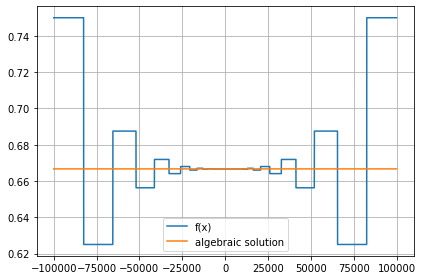

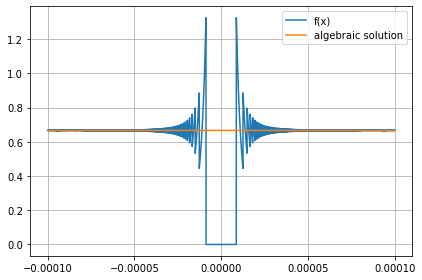

In [176]:
#graphic representaion c

#f(x)
y = np.linspace(-100000,100000,1000000)
plt.plot(y, f(y), label = "f(x)")
plt.plot(y, 0*y + 2/3, label = "algebraic solution")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

#g(x)

x = np.linspace(-10**-4,10**-4,10000)
plt.plot(x, g(x), label = "f(x)")
plt.plot(x, 0*x + 2/3, label = "algebraic solution")
plt.xticks(np.arange(-10**-4, 1.001*10**-4,0.00005))
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

### d)

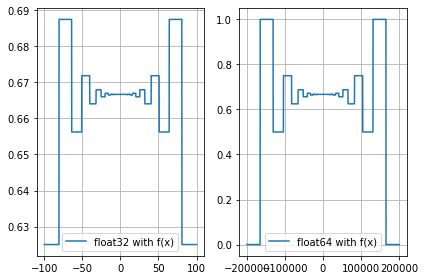

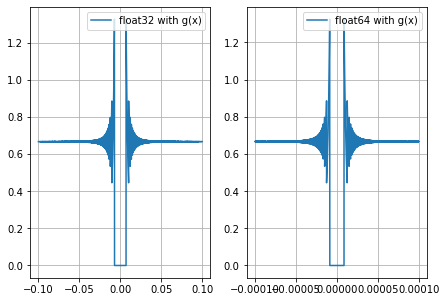

In [177]:
#d datatypes
y32 = np.linspace(-100,100,10000, dtype="float32")
y64 = np.linspace(-200000,200000,1000000, dtype="float64")
plt.subplot(1,2,1)
plt.plot(y32, f(y32), label = "float32 with f(x)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(y64, f(y64), label = "float64 with f(x)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

x = np.linspace(-0.0001,0.0001,10000)
x32 = np.linspace(-0.1,0.1,10000, dtype="float32")
x64 = np.linspace(-0.0001,0.0001,10000, dtype="float64")
plt.subplot(1,2,1)
plt.plot(x32, g(x32), label = "float32 with g(x)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(x64, g(x64), label = "float64 with g(x)")
plt.legend()
plt.grid()
plt.tight_layout(pad=0, h_pad=1.08, w_pad=1.08)
plt.show()
plt.close()


With the float32 datatype the range of numerical stable values is much smaller than with float64. 

## Exercise 2 
numerical stability and condition

### a)

$f(E, \theta)$ is numerically unstable $\forall$ $E \in \mathbb{R}$ $\backslash\{E = 0\}$, if $\theta$ approaches zero.

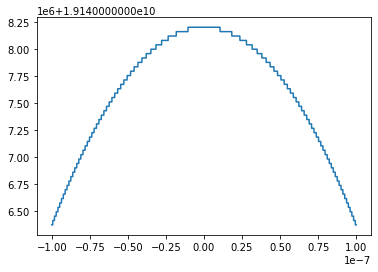

In [178]:
def f(E,theta):
    return (2+(np.sin(theta))**2)/(1-(np.sqrt(1-(E/511000)**(-2)))**2*(np.cos(theta))**2)

x = np.linspace(-1*10**-7, 1*10**-7, 1000000, dtype = "float64")
plt.plot(x,f(50*10**9,x))
plt.show()
plt.close()

As seen in the plot above the function for $E = 50 \mathrm{GeV}$ is in generell not stable, but with bigger values that unstability gets insignificantly small. A range of significant unstability could be $\forall \theta \in [-0.5\cdot10^{-7},0.5\cdot10^{-7}]$.

### b)

$f(E,\theta) = \frac{2+\mathrm{sin^2}(\theta)}{1 - \beta^2\mathrm{cos^2}(\theta)}$

substituting $\mathrm{cos^2}(\theta) = 1 - \mathrm{sin^2}(\theta)$

$\rightarrow f(E,\theta) = \frac{2+\mathrm{sin^2}(\theta)}{1 - \beta^2 + \beta^2\mathrm{sin^2}(\theta)}$

substituting $1 - \beta^2 = \frac{1}{\gamma^2}$

$\rightarrow f(E,\theta) = \frac{2+\mathrm{sin^2}(\theta)}{\frac{1}{\gamma^2} + \beta^2\mathrm{sin^2}(\theta)}$

This analytic transformation is numerically stable as will be seen graphically in c).

### c)


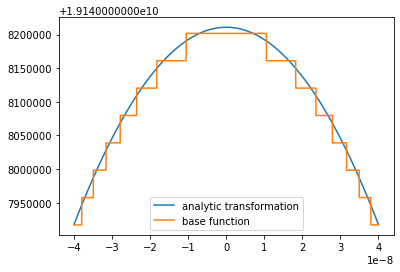

In [179]:
# E in eV
def gamma(E1):
    return E1/511000
def beta2(E1):
    return 1-(1/gamma(E1)**2) 
def f1(E1,theta):
    return (2+(np.sin(theta))**2)/((1/gamma(E1)**2+beta2(E1)**2*(np.sin(theta))**2))


x = np.linspace(-0.4*10**-7, 0.4*10**-7, 100000, dtype = "float64")
plt.plot(x,f1(50*10**9,x), label = "analytic transformation")
plt.plot(x,f(50*10**9,x), label = "base function")
plt.legend()
plt.show()
plt.close()

This plot shows, that the analytic transformation made in b) fixed the unstability problem of the function.

### d)

$K = \lvert \theta\cdot\frac{2\sin\theta\cos\theta\left(1-\beta^2\cos^2\theta\right)+(2+\sin^2\theta)2\beta^2\cos\theta\sin\theta}{(1-\beta^2\cos^2\theta)(2+\sin^2\theta)}\rvert$

### e)

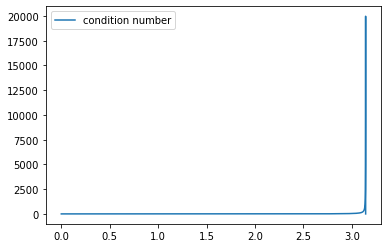

In [180]:
def gamma(E):
    return E/511000
def beta2(E):
    return 1-(1/gamma(E)**2) 
def upperf(E,theta):
    return 2*np.sin(theta)*np.cos(theta)*(1-beta2(E)*np.cos(theta)**2)-(2+np.sin(theta)**2)*(beta2(E))*2*np.cos(theta)*np.sin(theta)
def lowerf(E,theta):
    return (1-beta2(E)*np.cos(theta)**2)*(2+np.sin(theta)**2)
def K(E,theta):
    return np.abs(theta*upperf(E,theta)/lowerf(E,theta))

#x = np.linspace(3.14, 3.144, 10000, dtype = "float64")
x = np.linspace(0, np.pi, 10000, dtype = "float64")
plt.plot(x,K(50*10**9,x), label = "condition number")

plt.legend()
plt.show()
plt.close()
    

The problem ist poorly conditioned in an area of $\pi\pm 0.001$. On the rest of the area the problem is well conditioned.

### e)

The condition is maesure of how much a small change in the input of a problem changes the output of it. Numerical stability measures how precise an implemmentet function mirrors the analytic variant of it. 